### Load Dataset

In [187]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [188]:
train_df.head(10)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
5,5,Fitness First,Episode 19,26.54,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047
6,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024
7,7,News Roundup,Episode 44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517
8,8,Daily Digest,Episode 32,105.87,News,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124
9,9,Music Matters,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761


In [189]:
train_df.shape

(750000, 12)

In [190]:
test_df.shape

(250000, 11)

In [191]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


### Check dupilicated rows

In [192]:
train_df.duplicated().sum()

np.int64(0)

In [193]:
test_df.duplicated().sum()

np.int64(0)

### Check missing values

In [194]:
train_null_counts = train_df.isnull().sum()
train_null_counts[train_null_counts > 0]

Episode_Length_minutes          87093
Guest_Popularity_percentage    146030
Number_of_Ads                       1
dtype: int64

In [195]:
test_null_counts = test_df.isnull().sum()
test_null_counts[test_null_counts > 0]

Episode_Length_minutes         28736
Guest_Popularity_percentage    48832
dtype: int64

In [196]:
for column in train_df.columns:
    missing_val_percent = train_df[column].isnull().sum()/train_df.shape[0]
    print(f"Missing values percentage in the {column}: {missing_val_percent}")

Missing values percentage in the id: 0.0
Missing values percentage in the Podcast_Name: 0.0
Missing values percentage in the Episode_Title: 0.0
Missing values percentage in the Episode_Length_minutes: 0.116124
Missing values percentage in the Genre: 0.0
Missing values percentage in the Host_Popularity_percentage: 0.0
Missing values percentage in the Publication_Day: 0.0
Missing values percentage in the Publication_Time: 0.0
Missing values percentage in the Guest_Popularity_percentage: 0.19470666666666667
Missing values percentage in the Number_of_Ads: 1.3333333333333334e-06
Missing values percentage in the Episode_Sentiment: 0.0
Missing values percentage in the Listening_Time_minutes: 0.0


In [197]:
train_df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


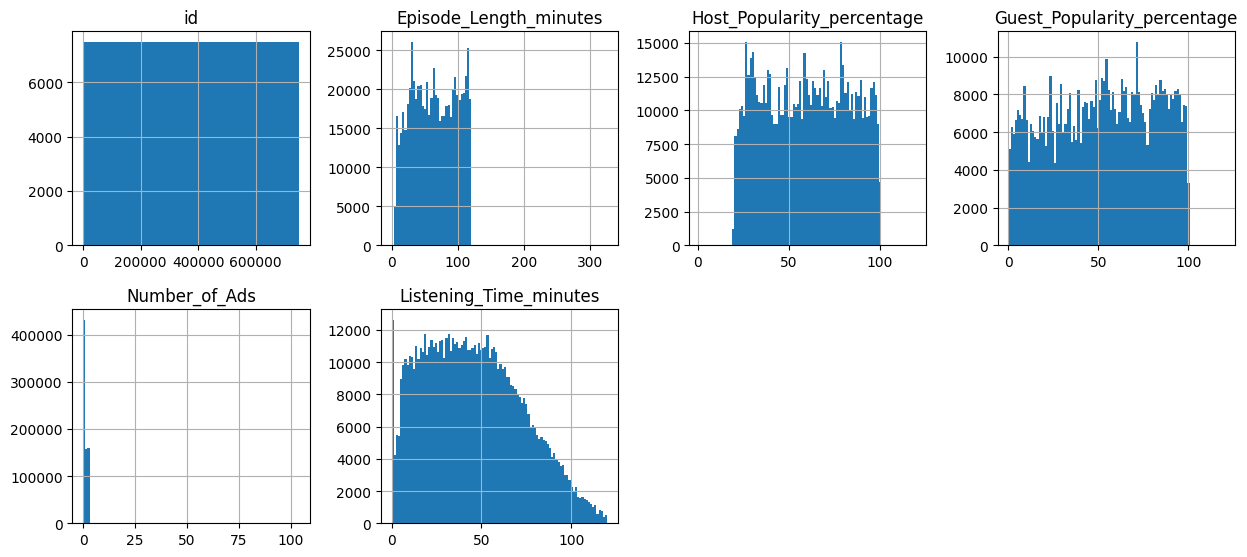

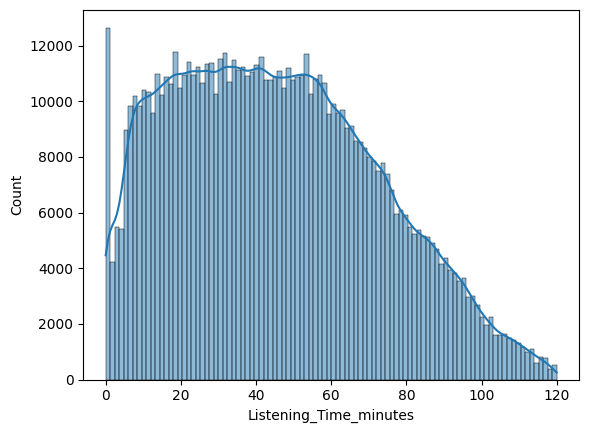

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df.hist(bins=100, figsize=(15, 10), layout=[3, 4])
plt.show()

sns.histplot(train_df["Listening_Time_minutes"], kde=True, bins=100)
plt.show()

Drop the entire row without the Number_of_Ads value as only one row is missing it.

In [199]:
train_df = train_df.dropna(subset=["Number_of_Ads"])

For other columns with missing values, since the missing value percentage is a bit large, not drop the rows with missing values but fill them with proper values.

In [200]:
# Fill missing values with median

# for train
train_df["Episode_Length_minutes"] = train_df["Episode_Length_minutes"].fillna(
    train_df["Episode_Length_minutes"].median()
)
train_df["Guest_Popularity_percentage"] = train_df[
    "Guest_Popularity_percentage"
].fillna(train_df["Guest_Popularity_percentage"].median())

# for test
test_df["Episode_Length_minutes"] = test_df["Episode_Length_minutes"].fillna(
    train_df["Episode_Length_minutes"].median()
)
test_df["Guest_Popularity_percentage"] = test_df[
    "Guest_Popularity_percentage"
].fillna(test_df["Guest_Popularity_percentage"].median())

In [201]:
train_df.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [202]:
test_df.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
dtype: int64

### Check correlations

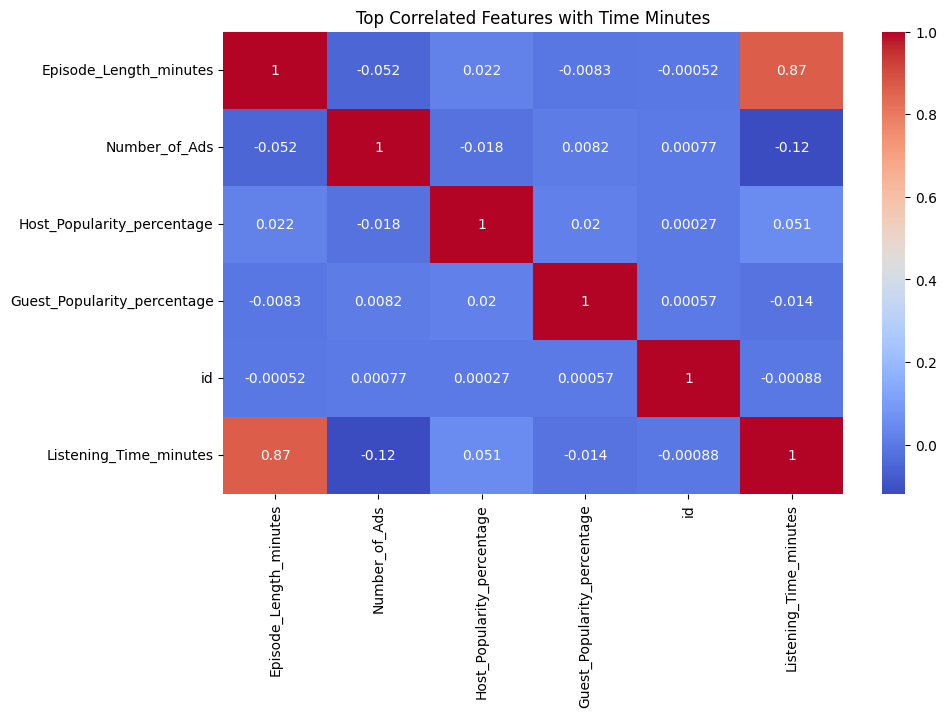

In [203]:
# Only numeric columns to compute correlation
numeric = train_df.select_dtypes(include=['number'])
corr = numeric.corr()

top_corr = corr["Listening_Time_minutes"].abs().sort_values(ascending=False)[1:11]

plt.figure(figsize=(10, 6))
sns.heatmap(numeric[top_corr.index.tolist() + ['Listening_Time_minutes']].corr(), annot=True, cmap="coolwarm")
plt.title("Top Correlated Features with Time Minutes")
plt.show()

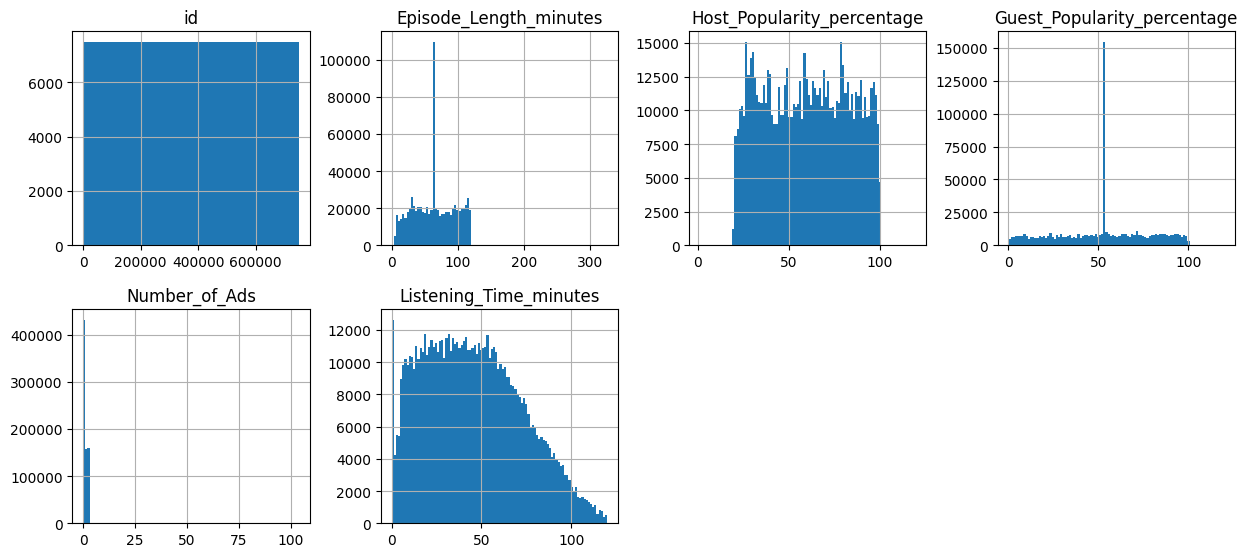

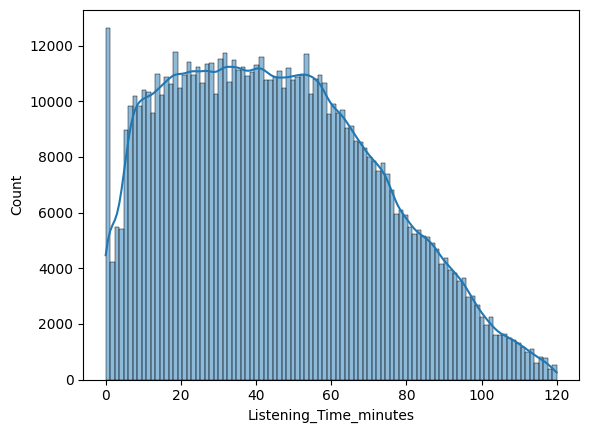

In [204]:
train_df.hist(bins=100, figsize=(15, 10), layout=[3, 4])
plt.show()

sns.histplot(train_df["Listening_Time_minutes"], kde=True, bins=100)
plt.show()

### Findings

Histgrams
- **Listening_Time_minutes**: Has a peek at around 0 minute, which indicates that most listeners tend to leave the episode just after a few seconds.
- **Episode_Length_minutes**: Has a strong peak at around 50, which I assume that it's known to be effective to capture listeners among the creators.

Correlations
- **Episode_Length_minutes**: Has a strong positive correlation. In general, the longer the episode is, the longer the listening time is going to be if the listener keeps listening to it.
- **Number_of_Ads**: Has a slight negative correlation, which indicates that the listener tends to leave the episode once they encounter ads.
